In [1]:
# Connect with sql (Password is not included)
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
engine = create_engine('postgres+psycopg2://postgres:@localhost:5432/employee_db')
connection = engine.connect()

In [2]:
# Get Dataframe from table salary
salaries = pd.read_sql("SELECT * FROM salaries", connection)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


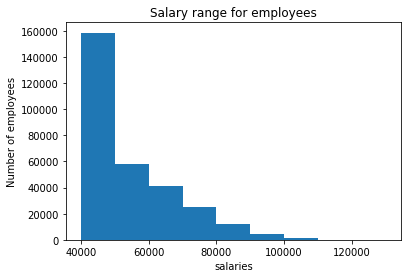

In [3]:
# Histgram for salary range for employees
plt.hist(salaries.salary, bins=[40000,50000,60000,70000,80000,90000,100000,110000,120000,130000])
plt.xlabel("salaries")
plt.ylabel("Number of employees")
plt.title("Salary range for employees")
plt.show()

Most common salary range for employees is between 40,000 and 50,000.

In [4]:
# Get dataframe from titles
titles = pd.read_sql("SELECT * FROM titles", connection)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [5]:
# Merge salaries and titles
s_t = pd.merge(salaries, titles, how='left', on='emp_no')
salaries_titles = s_t[['emp_no', 'salary', 'title']]
salaries_titles.head()

,emp_no,salary,title
0,10001,60117,Senior Engineer
1,10002,65828,Staff
2,10003,40006,Senior Engineer
3,10004,40054,Engineer
4,10004,40054,Senior Engineer


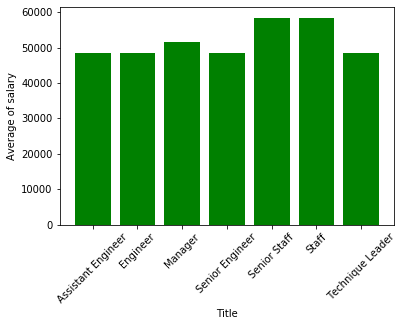

In [6]:
# Generate a bar plot showing the average of salary for the titles
grouped = salaries_titles.groupby(["title"])
mean = round(grouped.salary.mean(), 2)
x_axis = np.arange(len(mean))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, mean, color="g", width=0.8)
plt.xticks(tick_locations, mean.index, rotation=45)
plt.xlabel("Title")
plt.ylabel("Average of salary")
plt.show()